In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, gauss_norm
from burstfit.io import BurstIO
import logging

In [2]:
logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)

#### Get candidate cutout and preprocess
#### BurstData class (get data cutout and pre-process)

In [3]:
fil_file = '../tests/data/tcand_2_dm_565.30000_snr_11.92560.fil'

In [4]:
bd = BurstData(
    fp=fil_file,
    dm=565.3,
    tcand=2,
    width=64,
    snr=11.9,
    min_samp=256,
)

In [5]:
# We will mask channel numbers from 53 to 64 as they are 0. 
bd.prepare_data(mask_chans=[(53, 64)])

2021-03-12 19:43:53,378 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2021-03-12 19:43:53,426 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2021-03-12 19:43:53,427 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2021-03-12 19:43:53,474 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (128.00148285380777, 19.999437514831243)


Using <class 'str'>:
../tests/data/tcand_2_dm_565.30000_snr_11.92560.fil

#### Fitting using BurstFit
#### Define relevant functions for profile, spectra and spectrogram

In [6]:
# For pulse, we will use a gaussian convolved with an exponential model 
pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)

# For spectra, we will use a normalized gaussian model  
snames = ['mu_f', 'sigma_f']
spectraModel = Model(gauss_norm, param_names=snames)

In [7]:
sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
                        mask=bd.mask, clip_fac=bd.clip_fac)

#### Provide basic candidate information to BurstFit: sgram, model, DM, width, RFI mask, etc 

In [8]:
bf = BurstFit(
    sgram_model=sgramModel,
    sgram=bd.sgram,
    width=bd.width,
    dm=bd.dm,
    foff=bd.foff,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask=bd.mask) 

#### Fitting ....

2021-03-12 19:43:53,671 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 19:43:53,672 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 19:43:53,682 - tests -root - INFO - P values: T-test (0.60679), Kruskal (0.70429), KS (0.87426), F-test (0.61511)
2021-03-12 19:43:53,683 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2021-03-12 19:43:53,697 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00000), F-test (0.00044)
2021-03-12 19:43:53,698 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2021-03-12 19:43:53,714 - tests -root - INFO - P values: T-test (0.00000), Kruskal (0.00000), KS (0.00001), F-test (0.00015)
2021-03-12 19:43:53,714 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2021-03-12 19:43:53,717 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2021-03-12 19:43:53,760 - initial_profilefi

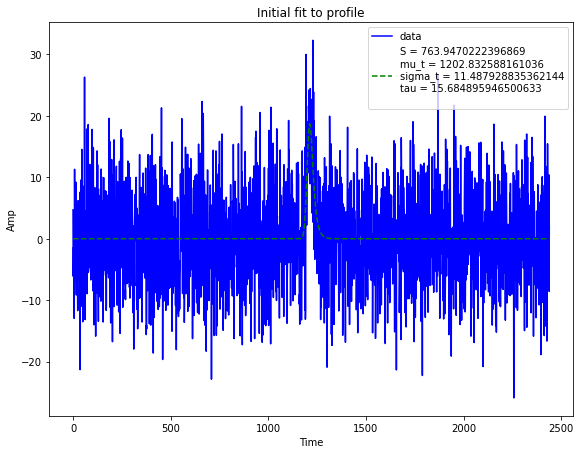

2021-03-12 19:43:54,133 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2021-03-12 19:43:54,135 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1
2021-03-12 19:43:54,141 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2021-03-12 19:43:54,141 - initial_spectrafit -burstfit.fit - INFO - mu_f: 24.478044459914074 +- 0.40858355670038715
2021-03-12 19:43:54,142 - initial_spectrafit -burstfit.fit - INFO - sigma_f: 5.876907075384988 +- 0.3336071378032658


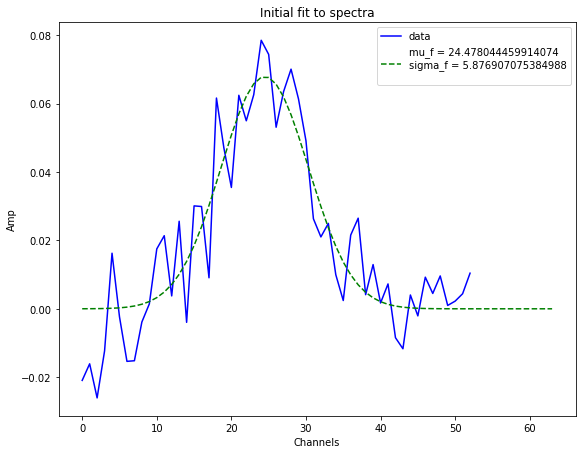

2021-03-12 19:43:54,611 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2021-03-12 19:43:54,612 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [24.478044459914074, 5.876907075384988, 763.9470222396869, 1202.832588161036, 11.487928835362144, 15.684895946500633, 565.3]
2021-03-12 19:43:55,154 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2021-03-12 19:43:55,155 - sgram_fit -burstfit.fit - INFO - mu_f: 24.975849003327195 +- 0.3914311686459791
2021-03-12 19:43:55,156 - sgram_fit -burstfit.fit - INFO - sigma_f: 6.166294966919394 +- 0.3834043551301487
2021-03-12 19:43:55,157 - sgram_fit -burstfit.fit - INFO - S: 731.2832079635614 +- 48.013029647860286
2021-03-12 19:43:55,157 - sgram_fit -burstfit.fit - INFO - mu_t: 1207.2991214508688 +- 4.213243536228096
2021-03-12 19:43:55,158 - sgram_fit -burstfit.fit - INFO - sigma_t: 11.259609732524533 +- 1.5688742150501045
2021-03-12 19:43:55,158 - sgram_fit -burstfit.fit - INFO - tau: 6.

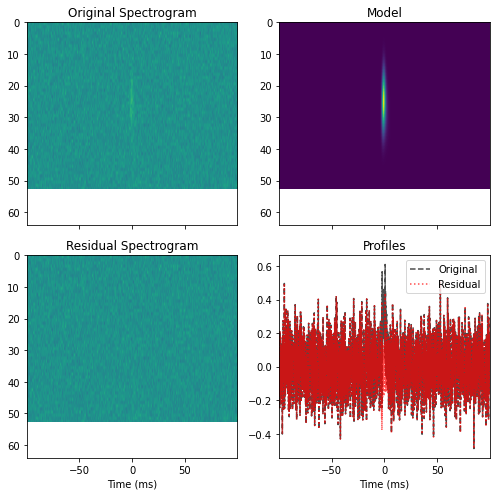

2021-03-12 19:43:56,040 - model -burstfit.fit - INFO - Making model.
2021-03-12 19:43:56,044 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 19:43:56,056 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2021-03-12 19:43:56,057 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2021-03-12 19:43:56,060 - model -burstfit.fit - INFO - Making model.
2021-03-12 19:43:56,060 - model -burstfit.fit - INFO - Found 1 components.
2021-03-12 19:43:56,073 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 0.9957156205218006
2021-03-12 19:43:56,074 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2021-03-12 19:43:56,075 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2021-03-12 19:43:56,084 - tests -root - INFO - P values: T-test (0.60679), Kruskal (0.70429), KS (0.87426), F-test (0.61511)
2021-03-12 19:43:56,084 - run

In [9]:
bf.fitall(plot=True)

#### We can use BurstIO class to save the results. 

In [10]:
bio = BurstIO(bf, bd)

In [11]:
d = bio.save_results()

2021-03-12 19:43:56,193 - set_attributes_to_save -burstfit.io - INFO - Setting attributes to be saved.
2021-03-12 19:43:56,194 - set_attributes_to_save -burstfit.io - INFO - Reading attributes from BurstData object.
2021-03-12 19:43:56,194 - set_attributes_to_save -burstfit.io - INFO - Reading attributes from BurstFit object.
2021-03-12 19:43:56,195 - set_attributes_to_save -burstfit.io - INFO - Copied necessary attributes
2021-03-12 19:43:56,195 - save_results -burstfit.io - INFO - Preparing dictionary to be saved.
2021-03-12 19:43:56,195 - save_results -burstfit.io - INFO - Writing JSON file: /hyrule/data/users/kshitij/kg_121102/burstfit/examples/cand_tstart_57645.411052962729_tcand_2.0000000_dm_565.30000_snr_11.90000.json.


#### This saves the relevant parameters: header of the file, candidate parameters, fit results, function names to a JSON file. 
##### Here are the parameters that are saved: 

In [12]:
d

{'fileheader': {'filelist': ['../tests/data/tcand_2_dm_565.30000_snr_11.92560.fil'],
  'filename': '../tests/data/tcand_2_dm_565.30000_snr_11.92560.fil',
  'basename': 'tcand_2_dm_565.30000_snr_11.92560',
  'source_name': 'C0531+33',
  'ra_deg': 82.99416666666666,
  'dec_deg': 33.14711122222222,
  'bw': -800.0,
  'center_freq': 1374.53125,
  'nbits': 8,
  'format': 'fil',
  'dtype': 'uint8',
  'time_decimation_factor': 1,
  'frequency_decimation_factor': 1,
  'native_tsamp': 8.192e-05,
  'native_foff': -12.5,
  'native_nchans': 64,
  'native_nspectra': 48828.0,
  'fch1': 1774.53125,
  'npol': 1,
  'tstart': 57645.41105296273,
  'gl': -5.119968059432011,
  'gb': -0.22260846394980457,
  'tstart_utc': '2016-09-14T09:51:54.976'},
 'nstart': 24382.0,
 'tcand': 2,
 'mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        Fa

#### Fitted parameters for all components are saved in sgram_params['all']

In [14]:
d['sgram_params']['all']

{1: {'popt': [24.975849003327195,
   6.166294966919394,
   731.2832079635614,
   1207.2991214508688,
   11.259609732524533,
   6.132069921186363,
   564.3361968307069],
  'perr': array([ 0.39143117,  0.38340436, 48.01302965,  4.21324354,  1.56887422,
          1.62351806,  0.52390598])}}